## Import 1: Classes & Path

In [1]:
# Import 1. 
# Import classes into notebook from src folder. 
import sys

# Path relative to your notebook.
sys.path.append("/Users/joel/Desktop/daimil10/CAPSTONE_2/Niger-Political-Shift-Examination/src/")

# Import my .py classes.(more edits later).
import data_clean
import plots
import models
import hypo_test

# Auto reload.
%load_ext autoreload
%autoreload 2

## Import 2: Initiate Classes

In [2]:
# Need to do the a = b.c() format.
cleaner = data_clean.Clean()
plotter = plots.Plot()
model_maker = models.Model()
h_tester = hypo_test.Hypothesis()

## Import 3: All Libs

In [3]:
# Import 2.
# All libs and modules I'll be using.
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as mticker
from matplotlib.ticker import FuncFormatter
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
style.use('fivethirtyeight')

## Read File & Inital Drop of Columns

In [4]:
# Read file in.
# Dropping columns to trim data to 1996-2022 (26 years).
# Use clean class and init a cleaner object.
# Using .readfile method for data_clean class.
niger = cleaner.read_file('/Users/joel/Desktop/daimil10/CAPSTONE_2/Niger-Political-Shift-Examination/data/Niger.csv')
# Making it so I have my 26 year time frame. 
niger = niger.drop(['Country Name', 'Country Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995'], axis=1)

# Make a metadata df for indicator name, source note, and source_org just in case. (would be shocked I use this)
niger_meta = cleaner.read_file('/Users/joel/Desktop/daimil10/CAPSTONE_2/Niger-Political-Shift-Examination/data/Metadata_Indicator_Descriptors.csv')

# Taking a look at the first 5 rows. 
niger.head()

,Indicator Name,Indicator Code,1996,1997,1998,1999,2000,2001,2002,2003,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Consumption of iodized salt (% of households),SN.ITK.SALT.ZS,NaN,NaN,64.8,NaN,43.4,NaN,NaN,NaN,...,NaN,59.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"International migrant stock, total",SM.POP.TOTL,NaN,NaN,NaN,NaN,122260.0,NaN,NaN,NaN,...,NaN,NaN,189255.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Children in employment, wage workers (% of chi...",SL.WAG.0714.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,NaN,NaN,NaN,NaN,NaN,1.47,NaN,NaN,...,NaN,0.52,NaN,NaN,7.77,NaN,NaN,NaN,NaN,NaN
4,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.NE.ZS,NaN,NaN,NaN,NaN,NaN,0.93,NaN,NaN,...,NaN,0.43,NaN,NaN,7.79,NaN,NaN,NaN,NaN,NaN


## Describing the Dataset

In [5]:
# Describing the Dataset 1.
cleaner.describe_dataframe(niger)

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,722,701,754,713,884,854,867,890,902,976,...,959,"1,061",991,973,"1,016",954,896,793,665,288
mean,"45,494,970,418","48,817,802,216","50,890,872,063","53,374,922,619","43,561,518,822","49,801,692,934","51,875,878,955","51,754,575,573","51,758,595,604","53,633,624,765",...,"110,059,991,606","106,360,325,558","119,756,320,971","127,710,184,521","129,087,917,014","149,650,645,622","169,730,885,040","185,340,190,226","244,117,752,625","481,601,657,597"
std,"259,405,937,215","273,512,924,129","292,020,157,481","301,238,051,369","270,963,918,939","301,121,551,043","316,710,398,354","319,902,846,257","322,340,665,894","340,224,785,408",...,"644,964,890,427","653,849,628,223","720,788,282,072","768,337,306,071","796,619,602,182","894,314,837,433","978,037,964,834","1,039,726,850,972","1,220,390,241,563","1,804,194,239,125"
min,"-73,200,000,000","-81,525,000,000","-110,403,000,000","-94,715,000,000","-96,058,000,000","-109,436,000,000","-135,041,000,000","-134,515,000,000","-167,505,000,000","-220,134,000,000",...,"-623,032,000,000","-742,860,000,000","-926,952,000,000","-757,983,000,000","-842,397,000,000","-1,029,010,000,000","-1,125,410,000,000","-1,225,480,000,000","-1,401,350,000,000","-1,625,610,000,000"
25%,5,6,6,6,4,6,5,5,5,6,...,6,6,5,5,7,5,6,4,6,4
50%,48,62,48,58,40,45,41,41,40,39,...,45,40,42,42,37,40,45,42,55,34
75%,"2,233,919","2,677,496","1,444,991","2,450,000","50,000","143,867","63,771","25,144","36,617","7,215",...,"45,100","1,170","10,088","23,837","7,814","31,304","321,889","703,879","6,799,690","6,347,849"
max,"2,650,270,000,000","2,715,640,000,000","2,938,890,000,000","2,921,010,000,000","2,890,930,000,000","3,133,580,000,000","3,308,750,000,000","3,370,440,000,000","3,408,670,000,000","3,656,930,000,000",...,"5,829,080,000,000","6,252,250,000,000","6,652,170,000,000","6,909,400,000,000","7,337,100,000,000","8,143,540,000,000","8,693,310,000,000","9,136,430,000,000","9,672,180,000,000","10,339,300,000,000"


In [6]:
# Describing the Dataset 2.
niger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1478 entries, 0 to 1477
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Indicator Name  1478 non-null   object 
 1   Indicator Code  1478 non-null   object 
 2   1996            722 non-null    float64
 3   1997            701 non-null    float64
 4   1998            754 non-null    float64
 5   1999            713 non-null    float64
 6   2000            884 non-null    float64
 7   2001            854 non-null    float64
 8   2002            867 non-null    float64
 9   2003            890 non-null    float64
 10  2004            902 non-null    float64
 11  2005            976 non-null    float64
 12  2006            1016 non-null   float64
 13  2007            978 non-null    float64
 14  2008            962 non-null    float64
 15  2009            1005 non-null   float64
 16  2010            1006 non-null   float64
 17  2011            1043 non-null   f

In [7]:
# Describing the Dataset 3.
niger.index

RangeIndex(start=0, stop=1478, step=1)

In [8]:
# Describing the Dataset 4.
niger.columns

Index(['Indicator Name', 'Indicator Code', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

In [9]:
# Describing the Dataset 5.
missing_v = niger.isnull().sum()
missing_v

Indicator Name       0
Indicator Code       0
1996               756
1997               777
1998               724
1999               765
2000               594
2001               624
2002               611
2003               588
2004               576
2005               502
2006               462
2007               500
2008               516
2009               473
2010               472
2011               435
2012               400
2013               519
2014               417
2015               487
2016               505
2017               462
2018               524
2019               582
2020               685
2021               813
2022              1190
dtype: int64

In [10]:
# Describing the Dataset 6.
# Using the function that spits out dict of col names and dtypes. 
cleaner.get_column_features(niger)

{'Indicator Name': dtype('O'),
 'Indicator Code': dtype('O'),
 '1996': dtype('float64'),
 '1997': dtype('float64'),
 '1998': dtype('float64'),
 '1999': dtype('float64'),
 '2000': dtype('float64'),
 '2001': dtype('float64'),
 '2002': dtype('float64'),
 '2003': dtype('float64'),
 '2004': dtype('float64'),
 '2005': dtype('float64'),
 '2006': dtype('float64'),
 '2007': dtype('float64'),
 '2008': dtype('float64'),
 '2009': dtype('float64'),
 '2010': dtype('float64'),
 '2011': dtype('float64'),
 '2012': dtype('float64'),
 '2013': dtype('float64'),
 '2014': dtype('float64'),
 '2015': dtype('float64'),
 '2016': dtype('float64'),
 '2017': dtype('float64'),
 '2018': dtype('float64'),
 '2019': dtype('float64'),
 '2020': dtype('float64'),
 '2021': dtype('float64'),
 '2022': dtype('float64')}

## Project Goal #1:
Niger Governance: Examine Three World Governance Indicators from 1996 to 2022 (26 years).

Data Points Used:
- Political Stability and Absence of Violence/Terrorism (6 representative sources): measures perceptions of the likelihood of political instability and/or politically-motivated violence, including terrorism. Estimate gives the country's score on the aggregate indicator, in units of a standard normal distribution, i.e. ranging from approximately -2.5 to 2.5.

- Control of Corruption (7 representative sources): captures perceptions of the extent to which public power is exercised for private gain, including both petty and grand forms of corruption, as well as "capture" of the state by elites and private interests. Estimate gives the country's score on the aggregate indicator, in units of a standard normal distribution, i.e. ranging from approximately -2.5 to 2.5.

- Goverment Effectivness (6 representative sources): captures perceptions of the quality of public services, the quality of the civil service and the degree of its independence from political pressures, the quality of policy formulation and implementation, and the credibility of the government's commitment to such policies. Estimate gives the country's score on the aggregate indicator, in units of a standard normal distribution, i.e. ranging from approximately -2.5 to 2.5.

In [11]:
# Need to figuere out indicator codes and how they line up with my desired catagories.
# Slice DF by PV.EST, CC.EST, GE.EST, RQ.EST, VA.EST, RL.EST indicator code which all make up the world governance index.
# Will only be using PV.EST, CC.EST, GE.EST as the amount of mising values for the other three make them a bit of a liability. 
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html
indicator_codes = ['PV.EST', 'CC.EST', 'GE.EST']
PG1 = niger[niger['Indicator Code'].isin(indicator_codes)]

# Using replace for the labels since these things are kinda long.
PG1['Indicator Name'] = PG1['Indicator Name'].replace('Political Stability and Absence of Violence/Terrorism: Estimate','Political Stability')
PG1['Indicator Name'] = PG1['Indicator Name'].replace('Control of Corruption: Estimate','Control of Corruption')
PG1['Indicator Name'] = PG1['Indicator Name'].replace('Government Effectiveness: Estimate','Government Effectiveness')

# No Data for 1997, 1999, 2001, 2022.
PG1 = PG1.drop(['1997', '1999', '2001', '2022'], axis=1)

/tmp/ipykernel_60689/2919863996.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PG1['Indicator Name'] = PG1['Indicator Name'].replace('Political Stability and Absence of Violence/Terrorism: Estimate','Political Stability')
/tmp/ipykernel_60689/2919863996.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PG1['Indicator Name'] = PG1['Indicator Name'].replace('Control of Corruption: Estimate','Control of Corruption')
/tmp/ipykernel_60689/2919863996.py:11: SettingWithCopyWarning: 
A value is trying to be

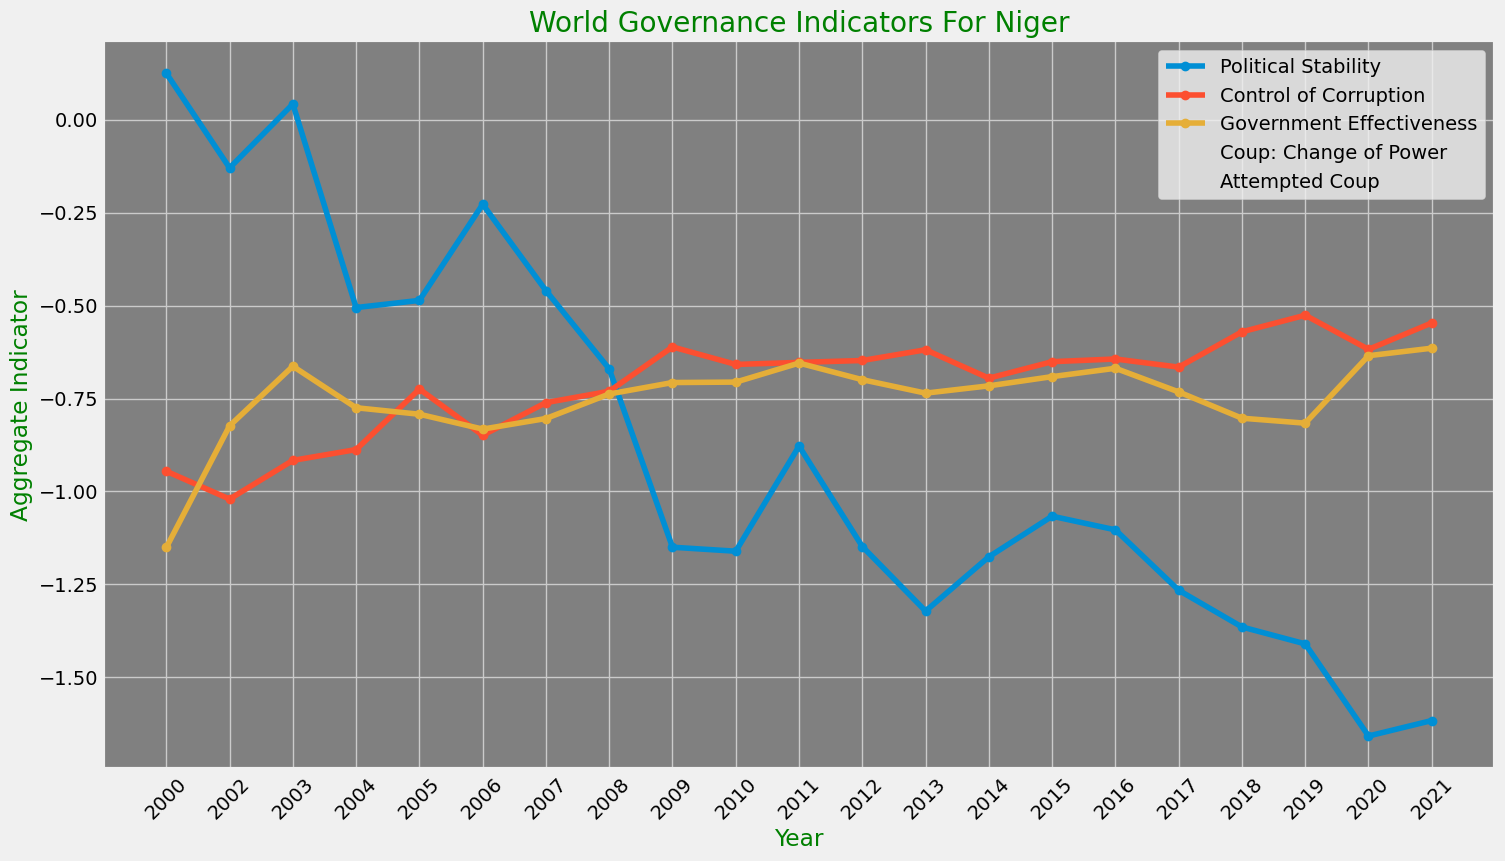

In [12]:
# Using plotter instance, with plot_wgi.
plotter.plot_wgi(PG1, indicator_codes)

## Project Goal #2:
Niger Economic Health: Explore Economic Indicators over the specified time frame.

Data Points Used:
- Inflation(Yearly%): as measured by the consumer price index reflects the annual percentage change in the cost to the average consumer of acquiring a basket of goods and services that may be fixed or changed at specified intervals, such as yearly. The Laspeyres formula is generally used.

- GDP Annual (Yearly%): Annual percentage growth rate of GDP at market prices based on constant local currency. Aggregates are based on constant 2015 prices, expressed in U.S. dollars. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources.

- Unemployment (Yearly%): refers to the share of the labor force that is without work but available for and seeking employment.

In [13]:
# For some reason some of the indicator codes were not populating..
# Made me do the long way istead.

# GDP growth annual (looked this up via the metadata df)
a = niger[niger['Indicator Code'] == 'NY.GDP.MKTP.KD.ZG']
# Inflation.
b = niger[niger['Indicator Code'] == 'FP.CPI.TOTL.ZG']
# Unemployment
c = niger[niger['Indicator Code'] == 'SL.UEM.TOTL.ZS'] 

# Combine them vertically (stacked like, wanting them on top of another starting with a).
# https://pandas.pydata.org/docs/reference/api/pandas.concat.html
PG2 = pd.concat([a, b, c], axis=0)

# Reset the index of the combined data frame (cause it was funky).
# Really a good idea whenever you mess with it via melt or concat.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html 
PG2 = PG2.reset_index(drop=True) # Dropping the old one. 

# Everything lines up for 25 years (thank goodness).
PG2.isnull().sum()

# Drop Indicator code, it will not be needed.
PG2 = PG2.drop(['Indicator Code'], axis=1)

In [14]:
# Get overall metrics for the legend. 
# This was a fun exercies and comparison from wrold bank (macro trends pulls from there as far as I can tell).

# https://www.macrotrends.net/countries/WLD/world/inflation-rate-cpi
world_inflation = [3.50, 1.92, 2.19, 2.44, 2.19, 1.55, 1.43, 2.35, 2.62, 3.73, 4.82, 3.35, 2.93, 8.95, 4.81, 4.27, 4.11, 3.52, 3.03, 2.91, 3.84, 3.43, 3.04, 5.10, 5.55, 6.53]
world_infla_mean = np.mean(world_inflation)

# https://www.macrotrends.net/countries/WLD/world/gdp-gross-domestic-product
world_GDP = [5.87, -3.12, 2.59, 3.29, 3.39, 2.80, 3.08, 3.09, 2.81, 2.71, 3.31, 4.54, -1.34, 2.07, 4.38, 4.42, 4.00, 4.47, 3.11, 2.30, 2.01, 4.52, 3.55, 2.82, 3.88, 3.59]
world_gdp_mean = np.mean(world_GDP)

# https://www.macrotrends.net/countries/WLD/world/unemployment-rate
world_unemploy = [6.18, 6.58, 5.36, 5.40, 5.56, 5.66, 5.63, 5.61, 5.73, 5.74, 5.77, 5.90, 6.00, 5.41, 5.42, 5.63, 5.90, 6.00, 6.16, 6.07, 5.85, 5.76, 5.96, 5.85, 5.70, 5.70]
world_unemploy_mean = np.mean(world_unemploy)

# https://data.worldbank.org/country/niger
niger_unemploy = [2.027, 1.99, 1.92, 1.939, 1.913, 1.841, 2.614, 3.355, 4.047, 4.586, 3.748, 2.937, 2.11, 1.374, 0.68, 0.156, 5.333, 2.919, 0.403, 0.425, 0.446, 0.468, 0.489, 0.512, 0.787, 0.312, 0.256]
niger_unemploy_mean = np.mean(niger_unemploy)

niger_inflation = [5.288857513, 2.933452534, 4.548015777, -2.302125038, 2.900149736, 4.005514284, 2.628865979, -1.614407692, 0.262543757, 7.797497818, 0.04048583, 0.053959261, 11.30510988, 0.582906591, 0.804073081, 2.94238514, 0.45508982, 2.29723115, -0.93028726, -0.57609037, 1.653889224, 2.796373189, 2.96760366, -2.489792651, 2.89819376, 3.837868028, 4.226217919]
niger_inflation_mean = np.mean(niger_inflation)

niger_gdp = [9.972614956, -0.219562518, -1.208477741, 7.268134902, 4.918470576, 2.170610384, 0.363801579, 7.331868843, 5.931049974, 3.142724084, 7.731414228, 1.962600907, 8.578166743, 2.357756936, 10.54894458, 5.315130634, 6.642136655, 4.392648832, 5.740893151, 5.001359945, 7.210803008, 5.941396863, 3.550227506, 1.387129177, 11.50000492]
niger_gdp_mean = np.mean(niger_gdp)

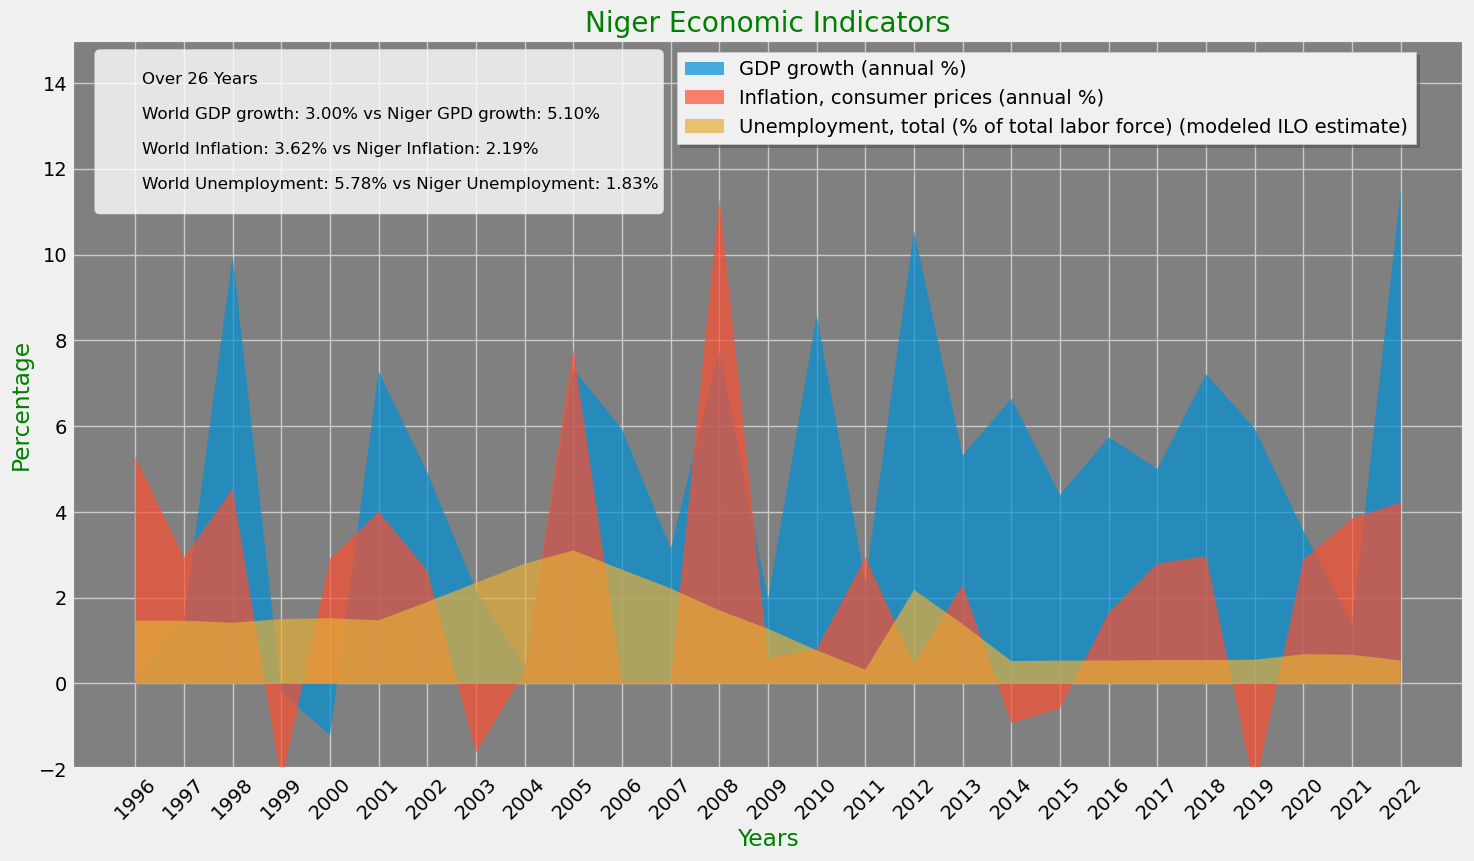

In [15]:
# Using plotter instance, with plot_ei method.
plotter.plot_ei(PG2)

## Project Goal #3:
Niger Leadership: Highlight Political Regime Effestiveness.

Data Points Used:
- Goverment Effectivness (6 representative sources): captures perceptions of the quality of public services, the quality of the civil service and the degree of its independence from political pressures, the quality of policy formulation and implementation, and the credibility of the government's commitment to such policies. Estimate gives the country's score on the aggregate indicator, in units of a standard normal distribution, i.e. ranging from approximately -2.5 to 2.5.

In [16]:
# Reuse WGI code from PG1.
# Just doing GE this time to highlight regime effectiveness.
indicator_codes = ['GE.EST']
PG3 = niger[niger['Indicator Code'].isin(indicator_codes)]

# Using replace for the labels since they are kinda long (did this for PG1).
PG3['Indicator Name'] = PG3['Indicator Name'].replace('Government Effectiveness: Estimate', 'Government Effectiveness')

# Get the column names for the years of each leader's regime.
# 1996 - 1999: Ibrahim Bare Mainassara.
# 1999 - 2010: Mamadou Tandja.
# 2011- 2021:  Mahamadou Issoufou.
brahim_years = ['1996', '1997', '1998', '1999'] #some missing data.
mamadou_years = ['1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010']
issoufou_years = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

# Extract data for each leader's reign.
# https://www.geeksforgeeks.org/flatten-a-list-of-dataframes/
# Will never forget .values.flatten now.
# Game changer for just getting data out of a DF fast.
brahim_scores = PG3[brahim_years].values.flatten()
mamadou_scores = PG3[mamadou_years].values.flatten()
issoufou_scores = PG3[issoufou_years].values.flatten()

# Remove missing or invalid data (NaN or Null). 
# I can do that now that the VALUES ARE FLATTENED. 
# 1996 , 1999 regime has missing values - along with 2022 era which isnt really chartable. 
# I could drop these, this is a little more fun. 
brahim_scores = [score for score in brahim_scores if pd.notnull(score)]
mamadou_scores = [score for score in mamadou_scores if pd.notnull(score)]
issoufou_scores = [score for score in issoufou_scores if pd.notnull(score)]

# Get the mean for the callout text
# Will use these for the floating text boxes.
b_mean = np.mean(brahim_scores)
m_mean = np.mean(mamadou_scores)
i_mean = np.mean(issoufou_scores)

# Combine the data into a DataFrame to use.
# Just using a Dict to DF for the index and then the GE scores.
# kinda just change the year to the leader for this (another way to look at it).
data = pd.DataFrame({'Leader': ['Ibrahim Bare Mainassara'] * len(brahim_scores) + ['Mamadou Tandja'] * len(mamadou_scores) + ['Mahamadou Issoufou'] * len(issoufou_scores), 
                     'Government Effectiveness Score': brahim_scores + mamadou_scores + issoufou_scores})

/tmp/ipykernel_60689/80401801.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PG3['Indicator Name'] = PG3['Indicator Name'].replace('Government Effectiveness: Estimate', 'Government Effectiveness')


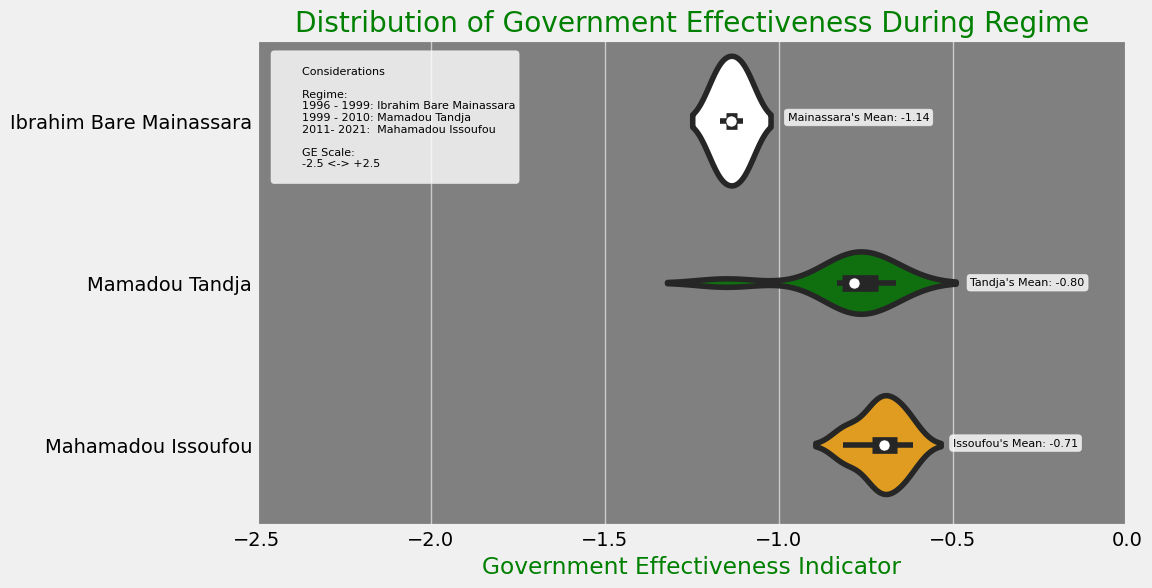

In [17]:
# Using plotter instance, with violin_ge method.
plotter.violin_ge(data, b_mean, m_mean, i_mean)

## Project Goal #4:
Niger Foreign Aid: Uncover data points related to foreign assistance from other countries.

Data Points Used:
- Net bilateral aid flows from DAC donors are the net disbursements of official development assistance (ODA) or official aid from the members of the Development Assistance Committee (DAC). Net disbursements are gross disbursements of grants and loans minus repayments of principal on earlier loans. ODA consists of loans made on concessional terms (with a grant element of at least 25 percent, calculated at a rate of discount of 10 percent) and grants made to promote economic development and welfare in countries and territories in the DAC list of ODA recipients. 

- Official aid refers to aid flows from official donors to countries and territories in part II of the DAC list of recipients: more advanced countries of Central and Eastern Europe, the countries of the former Soviet Union, and certain advanced developing countries and territories. Official aid is provided under terms and conditions similar to those for ODA. Part II of the DAC List was abolished in 2005. The collection of data on official aid and other resource flows to Part II countries ended with 2004 data. 

- DAC members are Australia, Austria, Belgium, Canada, Czech Republic, Denmark, Finland, France, Germany, Greece, Hungary, Iceland, Ireland, Italy, Japan, Korea, Luxembourg, The Netherlands, New Zealand, Norway, Poland, Portugal, Slovak Republic, Slovienia, Spain, Sweden, Switzerland, United Kingdom, United States, and European Union Institutions. Regional aggregates include data for economies not specified elsewhere. World and income group totals include aid not allocated by country or region. Data are in current U.S. dollars.

In [18]:
# Reuse PG1 code. 
# Tried to limit it to countires in the G20 that didnt have missing values.
# Focusing on DAC flows as the forgien aid since that can be stacked against GCF from world bank.  
indicator_codes = ['DC.DAC.GBRL.CD', 'DC.DAC.CECL.CD', 'DC.DAC.FRAL.CD', 'DC.DAC.DEUL.CD', 'DC.DAC.CANL.CD', 'DC.DAC.USAL.CD', 
'DC.DAC.JPNL.CD', 'DC.DAC.KORL.CD']
PG4 = niger[niger['Indicator Code'].isin(indicator_codes)]

# Missing Values scattered through only a handful though as opposed to the full list
PG4.isnull().sum()

# Using replace for the labels since they are kinda long (doing what I did above but found a replacement dict).
# Total game changer in the sense of having many replacements. 
rep = {
    'Net bilateral aid flows from DAC donors, United Kingdom (current US$)': 'United Kingdom',
    'Net bilateral aid flows from DAC donors, European Union institutions (current US$)': 'European Union',
    'Net bilateral aid flows from DAC donors, Korea, Rep. (current US$)': 'South Korea',
    'Net bilateral aid flows from DAC donors, France (current US$)': 'France',
    'Net bilateral aid flows from DAC donors, Germany (current US$)': 'Germany',
    'Net bilateral aid flows from DAC donors, Canada (current US$)': 'Canada',
    'Net bilateral aid flows from DAC donors, United States (current US$)': 'United States',
    'Net bilateral aid flows from DAC donors, Japan (current US$)': 'Japan'}
PG4['Indicator Name'] = PG4['Indicator Name'].replace(rep)

# This is really so I could visualize the numbers in the billions format. 
pd.options.display.float_format = '{:,.0f}'.format

# Droping some unwanted columns, dont need IC for this and 2022 is blank all around. 
PG4 = PG4.drop(['Indicator Code'], axis=1)

/tmp/ipykernel_60689/3219030277.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PG4['Indicator Name'] = PG4['Indicator Name'].replace(rep)


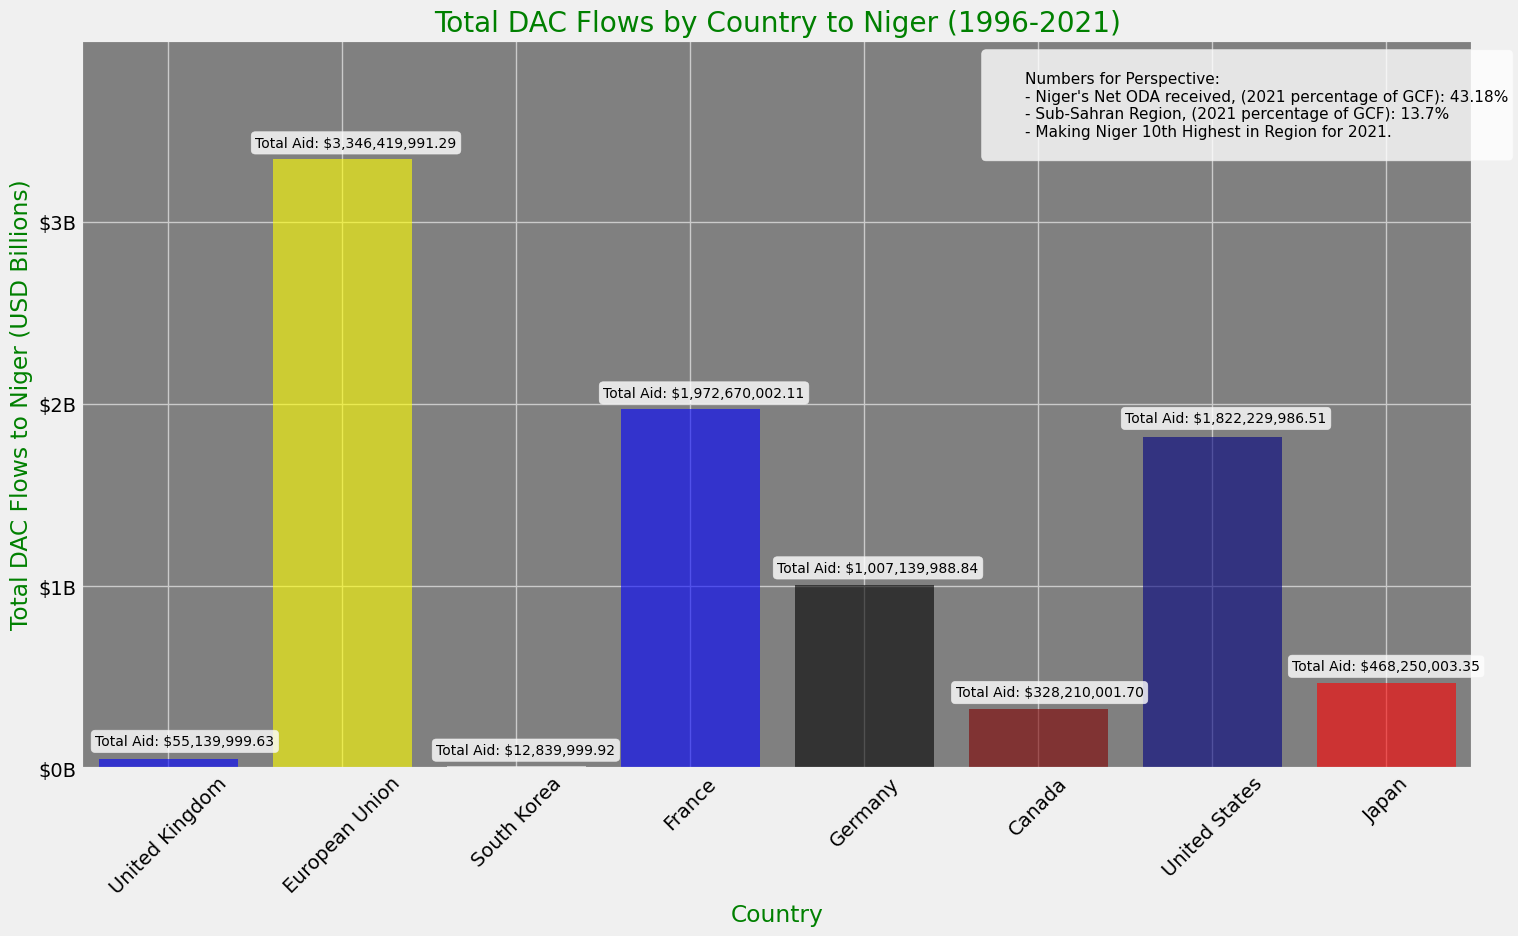

In [19]:
# Using plotter instance, with bar_fa method.
plotter.bar_fa(PG4, figsize=(16, 9), custom_colors=None)

## Project Goal #5: 
Niger Leadership - ANOVA on Gov Effectvness.

Data Points Used:
- Goverment Effectivness (6 representative sources): captures perceptions of the quality of public services, the quality of the civil service and the degree of its independence from political pressures, the quality of policy formulation and implementation, and the credibility of the government's commitment to such policies. Estimate gives the country's score on the aggregate indicator, in units of a standard normal distribution, i.e. ranging from approximately -2.5 to 2.5.

In [20]:
# With ANOVA --> 
# Null Hypothesis (H0): The means of the different groups are equal. In other words, there is no effect of the factor ('Regime') on the dependent variable. 
# This is equivalent to saying that 'Regime' does not impact the values you are measuring.

# Alternative Hypothesis (H1): At least one group mean is different from the others. 
# In other words, there is some effect of the factor ('Regime') on the dependent variable. 
# This means that at least one 'Regime' has a significantly different value from at least one other 'Regime'.

# Regime: 
# 1996 - 1999: Ibrahim Bare Mainassara
# 1999 - 2010: Mamadou Tandja
# 2011- 2021:  Mahamadou Issoufou

# Overall this was a great exercise in using a dict and then iterating over that dict into new vaules for the DF. 
# Really havent had to do that before (will def earmark this).

# Really need to get regimes and years aligned, even the early years with missing values.
regimes = {'Ibrahim Bare Mainassara': range(1996, 2000), 'Mamadou Tandja': range(2000, 2011), 'Mahamadou Issoufou': range(2011, 2022),}

# Melt the DataFrame to convert it from wide to long format (changing the dimensions of it since years are a the thing mapping to regime).
# https://pandas.pydata.org/docs/reference/api/pandas.melt.html
# https://www.geeksforgeeks.org/python-pandas-melt/ 
df_melted = PG3.melt(id_vars=['Indicator Name', 'Indicator Code'], var_name='Year', value_name='Indicator Value')

# Took me a little while to figure out the next method
# https://www.geeksforgeeks.org/python-next-method/ 
# Trying to map regime to year in the dict (regimes)
get_regime = lambda year: next((regime for regime, years in regimes.items() if year in years), None)

# Need to convert year to int to compare it to our dictonary ranges. 
df_melted['Regime'] = df_melted['Year'].astype(int).apply(get_regime)

# These are NaN rows and wont really help with ANOVA
rows_to_remove = [1, 3, 5, 26]

# Need to reset index after dropping rows each time. 
df_cleaned = df_melted.drop(rows_to_remove).reset_index(drop=True)

# Need to go 9 out to get accuracy since everything is really tiny (on that -2.5 to +2.5).
pd.options.display.float_format = '{:.9f}'.format
df_cleaned

,Indicator Name,Indicator Code,Year,Indicator Value,Regime
0,Government Effectiveness,GE.EST,1996,-1.169292927,Ibrahim Bare Mainassara
1,Government Effectiveness,GE.EST,1998,-1.104274154,Ibrahim Bare Mainassara
2,Government Effectiveness,GE.EST,2000,-1.150753498,Mamadou Tandja
3,Government Effectiveness,GE.EST,2002,-0.823412001,Mamadou Tandja
4,Government Effectiveness,GE.EST,2003,-0.663169801,Mamadou Tandja
5,Government Effectiveness,GE.EST,2004,-0.774815559,Mamadou Tandja
6,Government Effectiveness,GE.EST,2005,-0.792276323,Mamadou Tandja
7,Government Effectiveness,GE.EST,2006,-0.832272291,Mamadou Tandja
8,Government Effectiveness,GE.EST,2007,-0.803757966,Mamadou Tandja
9,Government Effectiveness,GE.EST,2008,-0.737796187,Mamadou Tandja


In [21]:
# Using h_tester instance, with perform_anova method.
h_tester.perform_anova(df_cleaned)

                    df      sum_sq     mean_sq            F      PR(>F)
C(Regime)  2.000000000 0.318142548 0.159071274 15.258055751 0.000094624
Residual  20.000000000 0.208507921 0.010425396          NaN         NaN


In [22]:
# So from some light research the next logical step would be to see about the Tukey HSD.

# Null Hypothesis (H0): The means of the two groups being compared are equal.

# Alternative Hypothesis (H1): The means of the two groups being compared are not equal. 
# (import part right here) ANOVA does not tell us which groups are different. 
# The Tukey HSD test helps us identify which specific group means are different from each other.

# Good summary -->
# The Tukey HSD ("honestly significant difference" or "honest significant difference") test is a statistical tool used to determine 
# if the relationship between two sets of data is statistically significant – that is, whether there's a strong chance that an observed 
# numerical change in one value is causally related to an observed change in another value. 
# In other words, the Tukey test is a way to test an experimental hypothesis.

# Using h_tester instance, with perform_tukey_hsd method.
h_tester.perform_tukey_hsd(df_cleaned)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
         group1               group2       meandiff p-adj  lower  upper  reject
-------------------------------------------------------------------------------
Ibrahim Bare Mainassara Mahamadou Issoufou   0.4308 0.0001 0.2322 0.6294   True
Ibrahim Bare Mainassara     Mamadou Tandja   0.3377  0.001 0.1376 0.5378   True
     Mahamadou Issoufou     Mamadou Tandja  -0.0931 0.1179 -0.206 0.0197  False
-------------------------------------------------------------------------------


## Project Goal #6:

Niger Foreign Aid: Simple Linear Regression Model, Predicts Niger's Gross Capital Formation using Net Bilateral Aid Flows from DAC donors (using these indicator codes):

Data Points Used:
- Net Official development assistance (ODA) comprises grants or loans to developing countries and territories on the OECD/DAC list of aid recipients that are undertaken by the official sector with promotion of economic development and welfare as the main objective and at concessional financial terms.

- Gross capital formation (formerly gross domestic investment) consists of outlays on additions to the fixed assets of the economy plus net changes in the level of inventories. Fixed assets include land improvements (fences, ditches, drains, and so on); plant, machinery, and equipment purchases; and the construction of roads, railways, and the like, including schools, offices, hospitals, private residential dwellings, and commercial and industrial buildings. Inventories are stocks of goods held by firms to meet temporary or unexpected fluctuations in production or sales, and "work in progress." According to the 1993 SNA, net acquisitions of valuables are also considered capital formation. Data are in current U.S. dollars.

- Net bilateral aid flows from DAC donors are the net disbursements of official development assistance (ODA) or official aid from the members of the Development Assistance Committee (DAC). Net disbursements are gross disbursements of grants and loans minus repayments of principal on earlier loans. ODA consists of loans made on concessional terms (with a grant element of at least 25 percent, calculated at a rate of discount of 10 percent) and grants made to promote economic development and welfare in countries and territories in the DAC list of ODA recipients. Official aid refers to aid flows from official donors to countries and territories in part II of the DAC list of recipients: more advanced countries of Central and Eastern Europe, the countries of the former Soviet Union, and certain advanced developing countries and territories. Official aid is provided under terms and conditions similar to those for ODA. Part II of the DAC List was abolished in 2005. The collection of data on official aid and other resource flows to Part II countries ended with 2004 data. DAC members are Australia, Austria, Belgium, Canada, Czech Republic, Denmark, Finland, France, Germany, Greece, Hungary, Iceland, Ireland, Italy, Japan, Korea, Luxembourg, The Netherlands, New Zealand, Norway, Poland, Portugal, Slovak Republic, Slovienia, Spain, Sweden, Switzerland, United Kingdom, United States, and European Union Institutions. Regional aggregates include data for economies not specified elsewhere. World and income group totals include aid not allocated by country or region. Data are in current U.S. dollars.

In [23]:
# Use total DAC (which is a portiod of ODA), GCF in USD, and Net ODA recieved (peercenrt of GCF).
# Really just want to see how these indicator codes match up in the grand scheme of things.
# In stead of indidvidual countires (make for an interesting graph) need total billatern flow.
# Need to format the billions.
pd.options.display.float_format = '{:,.0f}'.format
indicator_codes = ['DC.DAC.TOTL.CD', 'NE.GDI.TOTL.CD', 'DT.ODA.ODAT.GI.ZS']
PG6 = niger[niger['Indicator Code'].isin(indicator_codes)]

# Dropping Code and 2022 since there is no data.
PG6 = PG6.drop(['Indicator Code', '2022'], axis=1)

# Will neeed to do a similar melt as last time with PG5 since year will be a numerical amount. 
# https://pandas.pydata.org/docs/reference/api/pandas.melt.html
df_melt = PG6.melt(id_vars=['Indicator Name'], var_name='Year', value_name='Amount')

# After trial and error, found out this works better.. 
# Make two frames one for x and y for the model, then merge.
gcf_data = df_melt[df_melt['Indicator Name'] == 'Gross capital formation (current US$)']
dac_data = df_melt[df_melt['Indicator Name'] == 'Net bilateral aid flows from DAC donors, Total (current US$)']

# Merging on year and then making it numeric for the grand scheme
# Suffix thig is neat for the indicator name, not really needed but kinda cool.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
# Key works better with year for no overlap. (makes sense nothing else overlaps)
merged_data = pd.merge(gcf_data, dac_data, on='Year', suffixes=('_GCF', '_DAC'))
merged_data['Year'] = pd.to_numeric(merged_data['Year'])

In [24]:
# Okay now I can do the model.
# Using model_maker instance, and perform regression method.
X, results, summary = model_maker.perform_regression(merged_data)
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Amount_GCF   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     148.3
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           9.19e-12
Time:                        15:28:47   Log-Likelihood:                -558.37
No. Observations:                  26   AIC:                             1121.
Df Residuals:                      24   BIC:                             1123.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.749e+08   2.21e+08     -2.147      0.042   -9.31e+08   -1.84e+07
Amount_DAC     5.3360      0.438     12.179      0.000       4.432       6.240
==============================================================================
Omnibus:                        0.024   Durbin-Watson:                   1.037
Prob(Omnibus):                  0.988   Jarque-Bera (JB):                0.211
Skew:                           0.046   Prob(JB):                        0.900
Kurtosis:                       2.569   Cond. No.                     1.07e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

P Values:

- const: 0.04208...
This is the p-value for the model's y-intercept. A p-value of less than 0.05 typically indicates a statistically significant result. The y-intercept of the model (i.e., the predicted value of the Gross Capital Formation when the Net Bilateral Aid Flows is zero) is significantly different from zero.

- Amount_DAC: 0.00000000001...
This is the p-value for the 'Amount_DAC' variable. This very small p-value indicates that the coefficient for this variable is statistically significant. Indicating strong evidence that the Net Bilateral Aid Flows has a significant effect on the Gross Capital Formation.

In [25]:
# Formatting the pvalues to better analyize the results.
# Using the cleaner class, formatted pvalues method.
cleaner.formatted_pvalues(results)

const         0.04208389910
Amount_DAC    0.00000000001
dtype: object


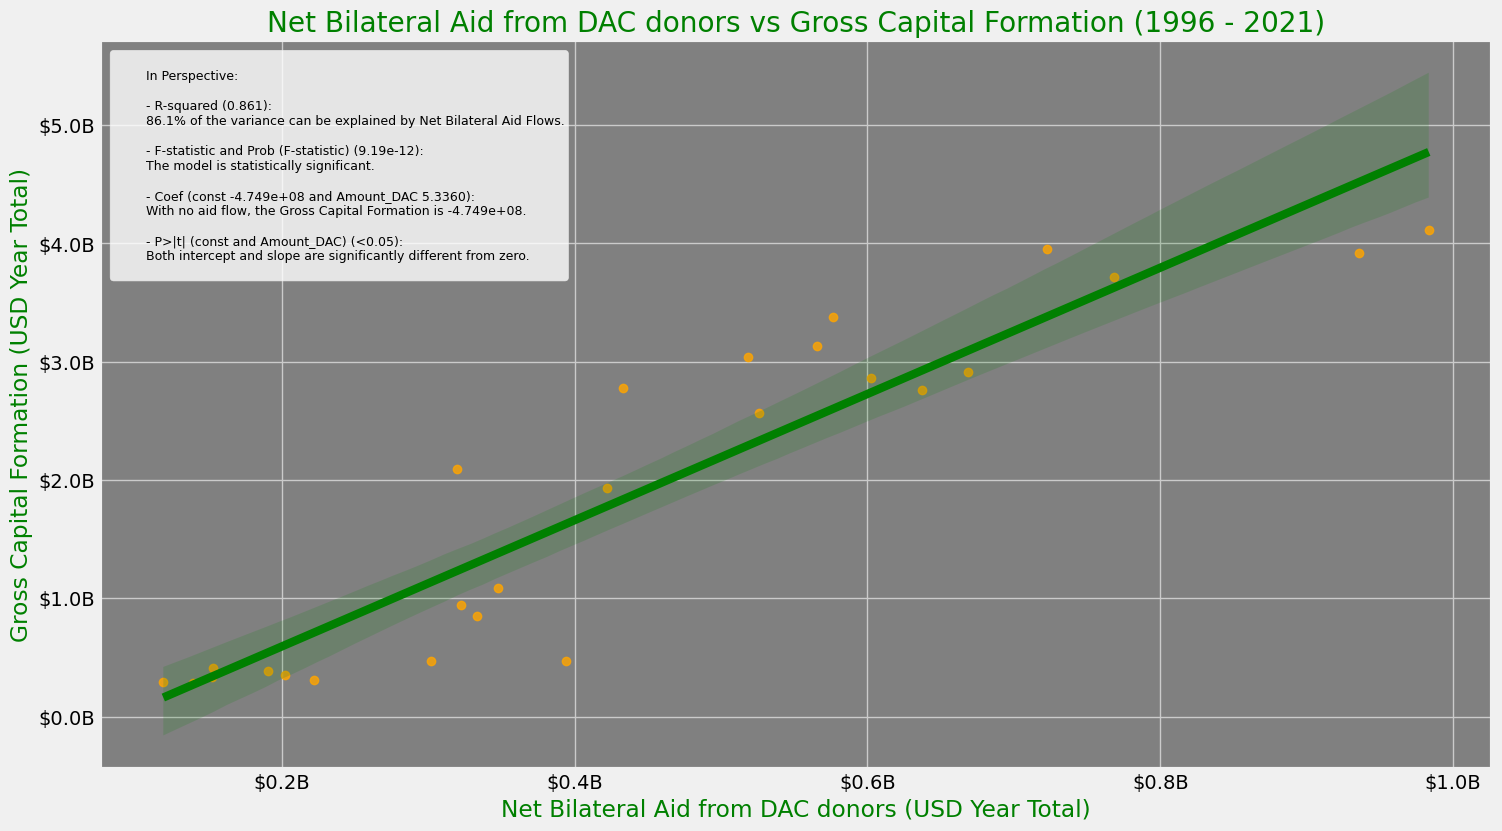

In [26]:
# Using plotter instance, with plot_regression method.
plotter.plot_regression(merged_data, 'Net Bilateral Aid from DAC donors vs Gross Capital Formation (1996 - 2021)', 
                        'Net Bilateral Aid from DAC donors (USD Year Total)',
                        'Gross Capital Formation (USD Year Total)')

Residual Analysis:

- Things appear to be in order. Nothing super non linear, Unequal Error (Heteroscedasticity), There are some outliers..
- If the residuals are randomly scattered around zero, it suggests a good fit for the model.

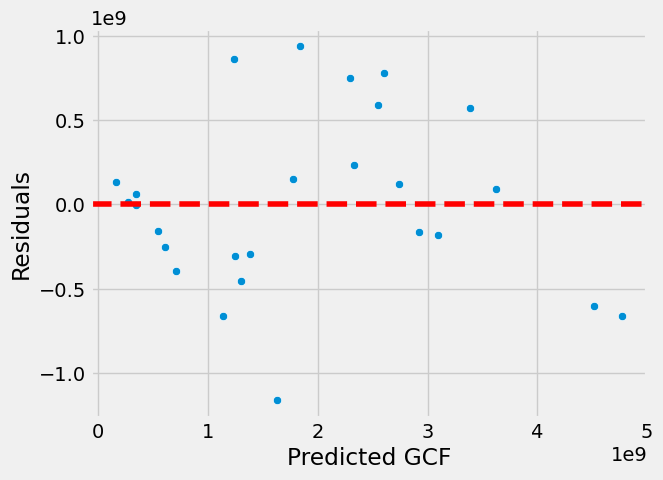

In [27]:
# Using plotter instance, with plot_residuals method.
plotter.plot_residuals(merged_data)

Multicolineaerity Check:

- VIF for Amount_DAC is 1, which is the minimum possible value for VIF indicating that there is no multicollinearity.
- Amount_DAC is not correlated with any other predictor variables in the model.

In [28]:
# Using model_maker instance, with calculate_vif method.
model_maker.calculate_vif(X)

,Variables,VIF
0,const,4
1,Amount_DAC,1


Cross Validation Check:

- MSE: On average, model's predictions are 5.2248430324784666e+17 units squared away from the actual value. 
- RMSE: By taking the square root of the MSE, we get an error term which is in the same units as original data. 
- RMSE is approximately 722,830,756.99. This means that on average, the model's predictions are about 722.83 million units away from the actual value.
- Particularly the scale of the 'Amount_GCF' variable is the key here. 
- If the typical 'Amount_GCF' values are in the range of billions, an RMSE of 722.83 million may indicate a good model fit. 
- If the typical 'Amount_GCF' values are in the millions, the model is likely not fitting the data well. 

In [29]:
# Using model_maker instance, with train_test_evaluate method.
model_maker.train_test_evaluate(merged_data)

Mean Squared Error: 5.2248430324784666e+17
Root MSE 722830756.9880011
